## **Importing some Important Libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

In [ ]:
import flask
import pandas
import numpy
import sklearn

print(f"Flask: {flask.__version__}")
print(f"Pandas: {pandas.__version__}")
print(f"Numpy: {numpy.__version__}")
print(f"Sklearn: {sklearn.__version__}")

Flask: 3.0.3
Pandas: 2.0.3
Numpy: 1.25.2
Sklearn: 1.5.2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_171864\2592876425.py:6: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.1. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print(f"Flask: {flask.__version__}")


In [6]:
import sys
print(f"Python version: {sys.version}")

Python version: 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]


## **Importing the data.**

In [2]:
df = pd.read_csv(r"Sleep_health_and_lifestyle_dataset.csv")

## **Reading the data.**

In [3]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [4]:
df.shape

(374, 13)

In [5]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## **EDA**

#### Extracting and Displaying Unique Values for Each Column (Excluding 'Person ID').

In [7]:
columns = [column for column in df.columns if column != 'Person ID']

for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95

#### Checking Null Values.

In [8]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

*Only, Sleep Disorder Column has Null Values.*

#### Handling Missing Values in the 'Sleep Disorder' Column

In [9]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [10]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No disorder')

In [11]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
No disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [12]:
df['Sleep Disorder'].isna().sum()

0

*Now, Our data not contains any Null values.*

#### Consolidating Categories in the 'BMI Category' Column

In [13]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [14]:
df['BMI Category'] = df['BMI Category'].replace({"Normal":"Normal Weight"})

In [15]:
df['BMI Category'].value_counts()

BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64

#### Visualizing the Distribution of 'Sleep Disorder' Across Different 'BMI Categories.

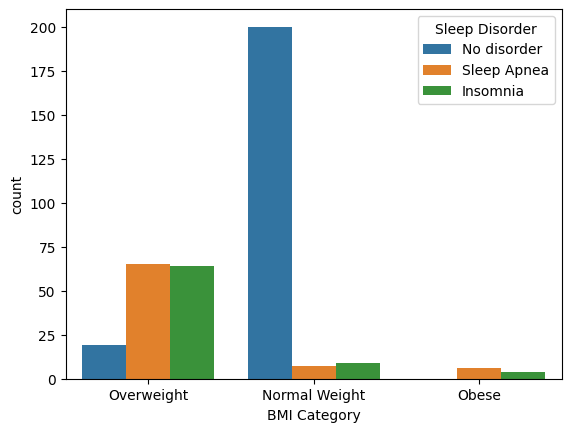

In [16]:
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=df)
plt.show()

- **Overweight Category**: Predominantly affected by Sleep Apnea and Insomnia.
- **Normal Weight Category**: Majority report No disorder.
- **Obese Category**: Low counts across all sleep disorders.

#### Visualizing the Distribution of 'Sleep Disorder' Across 'Occupation' Categories. 

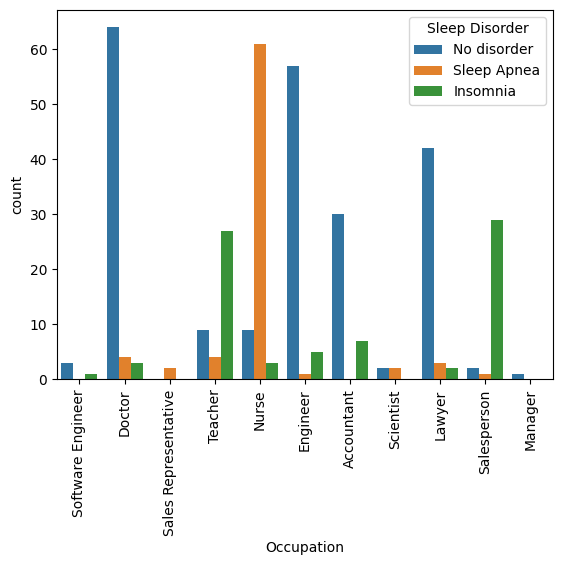

In [17]:
sns.countplot(x = df['Occupation'], hue=df['Sleep Disorder'], data=df)
plt.xticks(rotation=90)
plt.show()

- **Software Engineers**: Highest count with no sleep disorder.
- **Nurses**: Significant count with Sleep Apnea.
- **Teachers**: Notable count with Insomnia.
- **Sales Representatives**: Mixed distribution across all disorders.
- **Other Occupations**: Varied prevalence of sleep disorders.

#### Analyzing the Relationship Between 'Quality of Sleep' and 'Sleep Disorder'.  

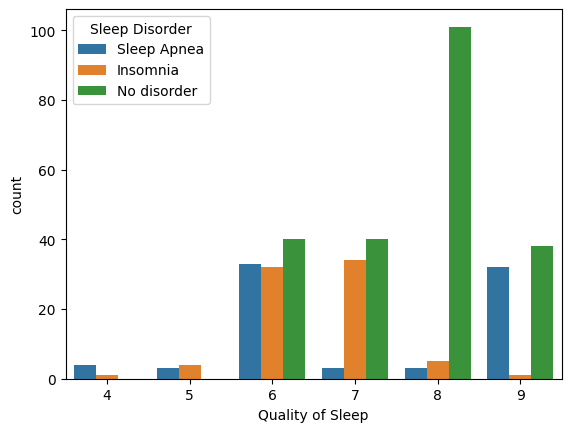

In [18]:
sns.countplot(x = df['Quality of Sleep'], hue=df['Sleep Disorder'], data=df)
plt.show()

- **Quality of Sleep Level 8**: Highest count of individuals with no sleep disorder.
- **Quality of Sleep Level 6**: Highest count of individuals with Sleep Apnea.
- **Quality of Sleep Level 7**: Highest count of individuals with Insomnia.
- **Overall**: Quality of Sleep level 8 has the highest overall count, predominantly with no sleep disorder.
- **Lowest Counts**: Quality of Sleep levels 4 and 5 have the lowest counts across all sleep disorders.

#### Examining the Distribution of 'Sleep Disorder' Across 'Daily Steps' Categories.  

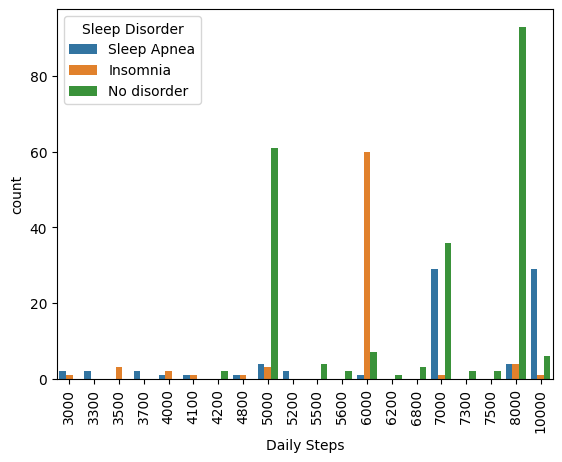

In [19]:
sns.countplot(x = df['Daily Steps'], hue=df['Sleep Disorder'], data=df)
plt.xticks(rotation=90)
plt.show()

- **No Disorder**: Highest counts at 5000, 6000, and 8000 steps.
- **Sleep Apnea**: Highest count at 7500 steps.
- **Insomnia**: Highest count at 6000 steps.
- **Distribution**: No disorder shows peaks, while Sleep Apnea and Insomnia are more evenly distributed.

#### Comparing 'Quality of Sleep' by 'Gender' Using a Violin Plot.

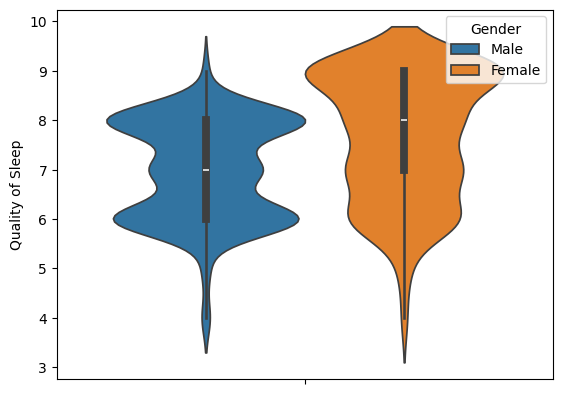

In [20]:
sns.violinplot(hue='Gender', y='Quality of Sleep', data=df)
plt.show()

- **Gender Comparison**: The violin plot compares sleep quality between males and females.
- **Distribution**: Both genders show a wide distribution in sleep quality scores, ranging from approximately 3 to 10.
- **Median**: Males and females have a similar median sleep quality score around 7.
- **Interquartile Range**: The middle 50% of sleep quality scores for both genders are tightly clustered around the median.
- **Outliers**: Some individuals in both genders have significantly lower sleep quality scores, indicated by the spread at the lower end.

#### Analyzing the Relationship Between 'Stress Level' and 'Quality of Sleep'.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_64036\703007106.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Quality of Sleep', y='Stress Level', data=df, ci=None, palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_64036\703007106.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quality of Sleep', y='Stress Level', data=df, ci=None, palette='viridis')


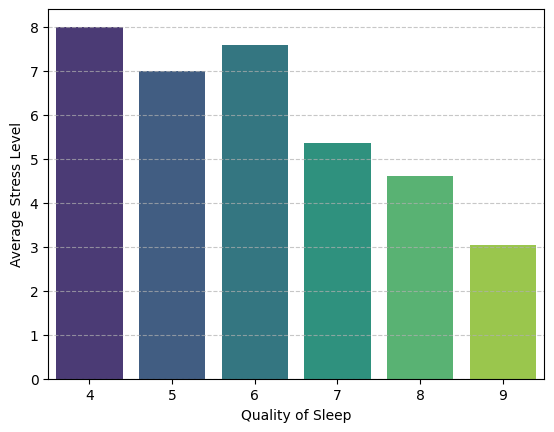

In [21]:
sns.barplot(x='Quality of Sleep', y='Stress Level', data=df, ci=None, palette='viridis')
plt.xlabel('Quality of Sleep')
plt.ylabel('Average Stress Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
warnings.filterwarnings('ignore')

- **Highest Stress Level**: Sleep quality of 4 has the highest average stress level (8).
- **Decreasing Trend**: Average stress level decreases as sleep quality improves.
- **Lowest Stress Level**: Sleep quality of 9 has the lowest average stress level (3).
- **Color Gradient**: Bars transition from dark purple (lower sleep quality) to light green (higher sleep quality).

#### Splitting and Converting 'Blood Pressure' into 'Systolic' and 'Diastolic' Columns.

In [22]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)
df.drop(columns=['Blood Pressure'], inplace=True)

#### Creating and Visualizing a Correlation Matrix for Numeric Features.

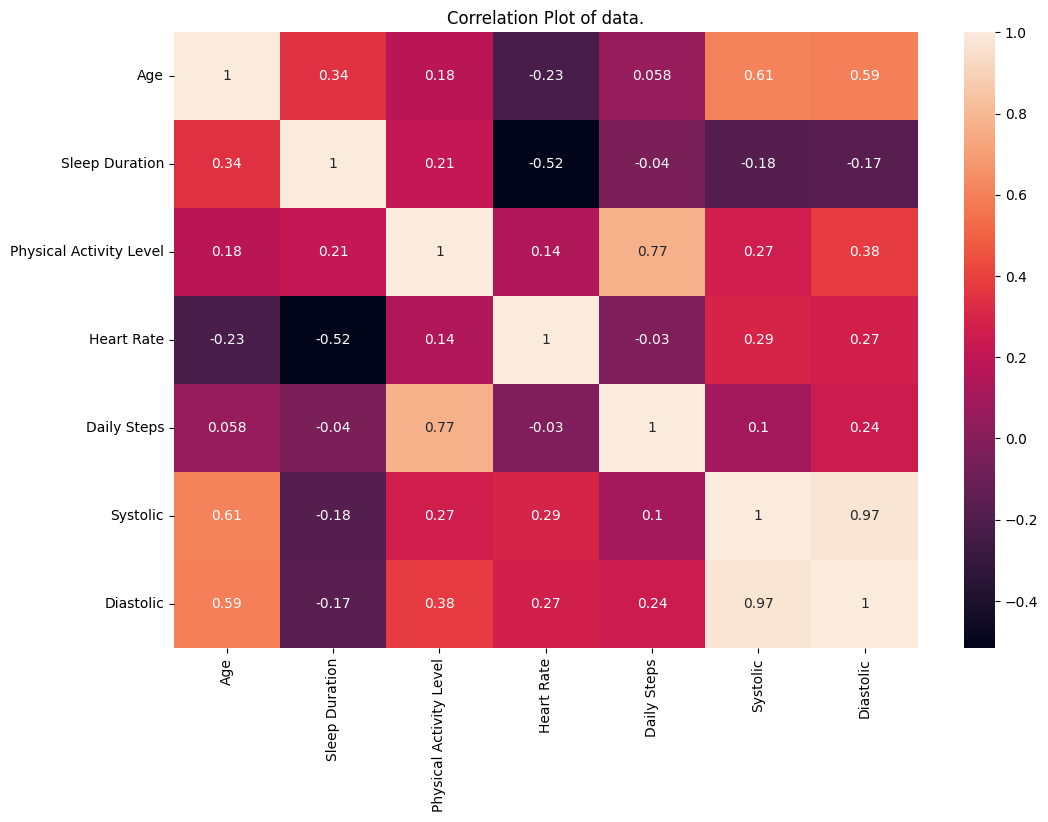

In [23]:
numeric = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

corr = df[numeric].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
plt.title("Correlation Plot of data.")
plt.show()

In [24]:
df.drop(columns=['Person ID'], inplace=True)

In [25]:
encoder = LabelEncoder()
df['Sleep Disorder'] = encoder.fit_transform(df['Sleep Disorder'])

In [26]:
print(encoder.classes_)

['Insomnia' 'No disorder' 'Sleep Apnea']


In [27]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,1,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,1,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,1,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,2,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,2,140,90


In [ ]:
df.shape 

(374, 13)

In [28]:
# df.to_csv("Sleep_health_dataset2.csv", index=False)